In [1]:
import math as mt
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from ipywidgets import *
%matplotlib widget

# Metodo de relajación

## $f^(x) = e^{1-x^2}$

## $f^{-1}(x) = \sqrt{1-ln(x)}$

## $f'(x) = -2xe^{1-x^2}$

$\dfrac{1}{f'(x)} =-\dfrac{e^{x^2-1}}{2x}$


In [3]:
def f(x):
    return np.sqrt(1-np.log(x))

def df(x):
    return -(np.exp(1-x**2))*(2*x)

In [4]:
N = 50
x0 = 0.1

xn = x0
for i in range(N):
    xn = f(xn)
    print('x_',i+1,'= ',xn)

x_ 1 =  1.817301596597011
x_ 2 =  0.6345449064808987
x_ 3 =  1.2061704770622241
x_ 4 =  0.9014153062011224
x_ 5 =  1.0506137198769554
x_ 6 =  0.9750002622873489
x_ 7 =  1.012579645742329
x_ 8 =  0.993729752313783
x_ 9 =  1.0031400641243098
x_ 10 =  0.9984311972193877
x_ 11 =  1.0007847094356639
x_ 12 =  0.9996077222029717
x_ 13 =  1.0001961581400374
x_ 14 =  0.9999019257389472
x_ 15 =  1.0000490383329448
x_ 16 =  0.9999754811341101
x_ 17 =  1.0000122595080934
x_ 18 =  0.9999938702647401
x_ 19 =  1.0000030648723266
x_ 20 =  0.9999984675650109
x_ 21 =  1.000000766217788
x_ 22 =  0.9999996168911793
x_ 23 =  1.0000001915544288
x_ 24 =  0.9999999042227902
x_ 25 =  1.000000047888606
x_ 26 =  0.9999999760556972
x_ 27 =  1.0000000119721515
x_ 28 =  0.9999999940139243
x_ 29 =  1.0000000029930378
x_ 30 =  0.9999999985034811
x_ 31 =  1.0000000007482595
x_ 32 =  0.9999999996258703
x_ 33 =  1.0000000001870648
x_ 34 =  0.9999999999064676
x_ 35 =  1.0000000000467661
x_ 36 =  0.9999999999766169
x_ 37 

In [5]:
x0 = 0.1
error = 1.0

xn = x0
xn_1 = x0

while error > 1e-17:
    xn_1,xn = f(xn_1),xn_1
    error = abs((xn_1-xn)/(1-1/df(xn)))
    print('error =',error,'x=',xn)

error = 0.6008997999992881 x= 0.1
error = 0.3152897947784407 x= 1.817301596597011
error = 0.39873675362791555 x= 0.6345449064808987
error = 0.1843337401303818 x= 1.2061704770622241
error = 0.1021996976918465 x= 0.9014153062011224
error = 0.04948650367185538 x= 1.0506137198769554
error = 0.025253009368985956 x= 0.9750002622873489
error = 0.012512795432213382 x= 1.012579645742329
error = 0.006286516454481685 x= 0.993729752313783
error = 0.0031359415937829245 x= 1.0031400641243098
error = 0.001569826487214163 x= 0.9984311972193877
error = 0.0007844526438013297 x= 1.0007847094356639
error = 0.00039234188680846525 x= 0.9996077222029717
error = 0.00019614210407124097 x= 1.0001961581400374
error = 9.807826835407674e-05 x= 0.9999019257389472
error = 4.903733090821444e-05 x= 1.0000490383329448
error = 2.4519116372684574e-05 x= 0.9999754811341101
error = 1.2259445469374319e-05 x= 1.0000122595080934
error = 6.129750915447758e-06 x= 0.9999938702647401
error = 3.0648684126530114e-06 x= 1.0000030648

# Magnetización (metodo de relajación)

In [5]:
def Magnet(m,T):
    return np.tanh(m/T)

def dM(m,T):
    return np.cosh(m/T)**(-2)

In [6]:
T = 1.1
m0 = 1
error = 1.0


m1 = m0
i = 0
while error > 1e-7:
    m1,m2 = mt.tanh(m1/T),m1
    error = abs((m1-m2)/(1-T*np.cosh(m2/T)**2))
    i=i+1
print("m",i," = ",m1)

m 162  =  9.544566451857926e-08


In [7]:
Tmax = 2.0
# temp = np.linspace(0.01,Tmax,1000)
temp = np.arange(0.01,Tmax,0.01)

In [8]:
m0 = 1


M = [m0]

for T in temp:
    error = 1.0
    m1 = m0
    if (T == 1): continue
    while error > 1e-7:
        m1,m2 = mt.tanh(m1/T),m1
        error = abs((m1-m2)/(1-T*np.cosh(m2/T)**2))
    
    M.append(float(m1))
   

In [9]:
# M

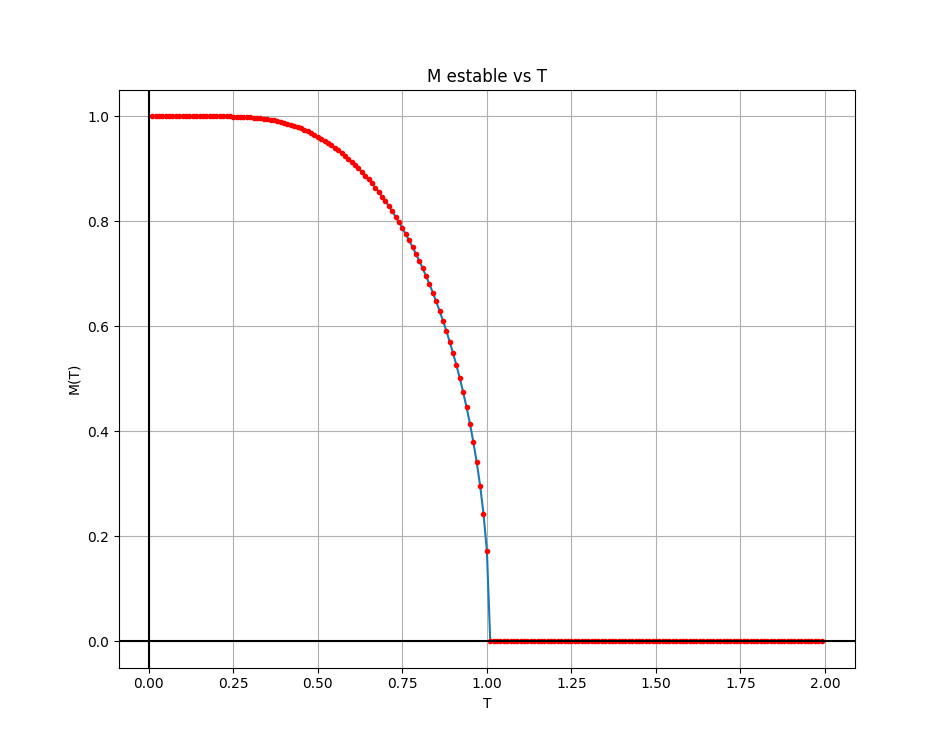

In [10]:
fig, ax = plt.subplots(figsize=(9.5, 7.5))

plt.plot(temp,M)
plt.plot(temp,M,'r.')

plt.title("M estable vs T")
plt.ylabel("M(T)")
plt.xlabel("T")
plt.axhline(y = 0.0, xmin = 0.0, color = 'black')
plt.axvline(x = 0.0, ymin = 0.0, color = 'black')
plt.grid()